### Importing Libraries


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


### Importing Dataset 

In [2]:
data = pd.read_csv('train.csv')


In [95]:
d_test = pd.read_csv('test.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
data_v2 =data.isna().sum().to_frame().reset_index()
data_v2.rename(columns={0: 'na_count'}, inplace=True)
data_v2


,index,na_count
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,0
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,0


## clean code and select the best feature

In [9]:
data['Age'].fillna(data['Age'].mean() ,  inplace=True)

In [11]:
data = data[['Survived','Pclass','Sex','Age','Parch','SibSp','Embarked' ]]
data

,Survived,Pclass,Sex,Age,Parch,SibSp,Embarked
0,0,3,male,22.000000,0,1,S
1,1,1,female,38.000000,0,1,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,0,1,S
4,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S
887,1,1,female,19.000000,0,0,S
888,0,3,female,29.699118,2,1,S
889,1,1,male,26.000000,0,0,C


## Data Preprocessing


#### label encoding (Sex , Embarked)

In [12]:
labeled = LabelEncoder()

In [13]:

for feature in ['Sex', 'Embarked']:
    tag = feature + '_label'
    data[tag] = labeled.fit_transform(data[feature])

C:\Users\PC\AppData\Local\Temp\ipykernel_10728\3022595999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[tag] = labeled.fit_transform(data[feature])
C:\Users\PC\AppData\Local\Temp\ipykernel_10728\3022595999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[tag] = labeled.fit_transform(data[feature])


### info 
in sex =>
         Male = 1
        ,female = 0

in Embarked =>
         C = 0
        ,Q = 1
        ,S = 2

In [14]:
data.drop(['Sex','Embarked'], axis = 1, inplace = True)

C:\Users\PC\AppData\Local\Temp\ipykernel_10728\2097599961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Sex','Embarked'], axis = 1, inplace = True)


In [15]:
data['family_size'] = data['Parch'] + data['SibSp'] + 1

C:\Users\PC\AppData\Local\Temp\ipykernel_10728\2414527087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['family_size'] = data['Parch'] + data['SibSp'] + 1


In [16]:

data.drop(['SibSp','Parch'], axis = 1, inplace = True)

C:\Users\PC\AppData\Local\Temp\ipykernel_10728\4060740246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['SibSp','Parch'], axis = 1, inplace = True)


In [17]:
data

,Survived,Pclass,Age,Sex_label,Embarked_label,family_size
0,0,3,22.000000,1,2,2
1,1,1,38.000000,0,0,2
2,1,3,26.000000,0,2,1
3,1,1,35.000000,0,2,2
4,0,3,35.000000,1,2,1
...,...,...,...,...,...,...
886,0,2,27.000000,1,2,1
887,1,1,19.000000,0,2,1
888,0,3,29.699118,0,2,4
889,1,1,26.000000,1,0,1


### Splitting & Preprocessing Data

In [18]:
X = data.drop(columns=['Survived'], axis=1)
y = data['Survived']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ================================================================

### Model Training & Predicting 


## LogisticRegression

In [39]:
clf_log = LogisticRegression()
scores = cross_validate(clf_log , X , y , scoring=['accuracy','average_precision'] , cv=10)
scores

{'fit_time': array([0.02059841, 0.03498197, 0.01181817, 0.00603676, 0.00850534,
        0.        , 0.01562357, 0.01562214, 0.02212954, 0.01563001]),
 'score_time': array([0.00233245, 0.00498319, 0.00399756, 0.        , 0.0156281 ,
        0.01562333, 0.        , 0.        , 0.        , 0.02011347]),
 'test_accuracy': array([0.78888889, 0.78651685, 0.7752809 , 0.82022472, 0.80898876,
        0.78651685, 0.78651685, 0.78651685, 0.80898876, 0.83146067]),
 'test_average_precision': array([0.82840171, 0.81075438, 0.74390789, 0.86181055, 0.86570135,
        0.81143102, 0.85639319, 0.82258982, 0.86886212, 0.85304708])}

In [40]:
scores = pd.DataFrame(scores)
scores

,fit_time,score_time,test_accuracy,test_average_precision
0,0.020598,0.002332,0.788889,0.828402
1,0.034982,0.004983,0.786517,0.810754
2,0.011818,0.003998,0.775281,0.743908
3,0.006037,0.000000,0.820225,0.861811
4,0.008505,0.015628,0.808989,0.865701
5,0.000000,0.015623,0.786517,0.811431
6,0.015624,0.000000,0.786517,0.856393
7,0.015622,0.000000,0.786517,0.822590
8,0.022130,0.000000,0.808989,0.868862
9,0.015630,0.020113,0.831461,0.853047


In [41]:
scores.test_accuracy.mean()

0.7979900124843945

In [42]:
scores.test_average_precision.mean()

0.8322899099801957

## SVC


In [71]:
cls = SVC()
paramter ={
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_search = GridSearchCV( cls, param_grid=paramter ,cv=5 )
grid_search.fit(X, y)
grid_search.best_params_


{'C': 100, 'gamma': 0.01}

In [47]:
clf_svc = SVC(C=100,gamma=0.01)
scores = cross_validate(clf_svc , X , y , scoring=['accuracy','average_precision'] , cv=10)
scores

{'fit_time': array([0.0836308 , 0.11202526, 0.08490419, 0.08117509, 0.07825017,
        0.09541631, 0.12501693, 0.10471559, 0.09779477, 0.10238433]),
 'score_time': array([0.00401044, 0.01320672, 0.01218104, 0.0166955 , 0.0061121 ,
        0.01297402, 0.03355765, 0.00550032, 0.        , 0.01200891]),
 'test_accuracy': array([0.81111111, 0.85393258, 0.7752809 , 0.87640449, 0.83146067,
        0.78651685, 0.82022472, 0.7752809 , 0.85393258, 0.86516854]),
 'test_average_precision': array([0.81683343, 0.84064161, 0.66767813, 0.85857927, 0.83932667,
        0.74865209, 0.83744213, 0.76659199, 0.82335077, 0.86776791])}

In [48]:
scores = pd.DataFrame(scores)
scores

,fit_time,score_time,test_accuracy,test_average_precision
0,0.083631,0.004010,0.811111,0.816833
1,0.112025,0.013207,0.853933,0.840642
2,0.084904,0.012181,0.775281,0.667678
3,0.081175,0.016695,0.876404,0.858579
4,0.078250,0.006112,0.831461,0.839327
5,0.095416,0.012974,0.786517,0.748652
6,0.125017,0.033558,0.820225,0.837442
7,0.104716,0.005500,0.775281,0.766592
8,0.097795,0.000000,0.853933,0.823351
9,0.102384,0.012009,0.865169,0.867768


In [49]:
scores.test_accuracy.mean()

0.8249313358302123

In [50]:
scores.test_average_precision.mean()

0.8066863999802643

## RandomForestClassifier

<Axes: >

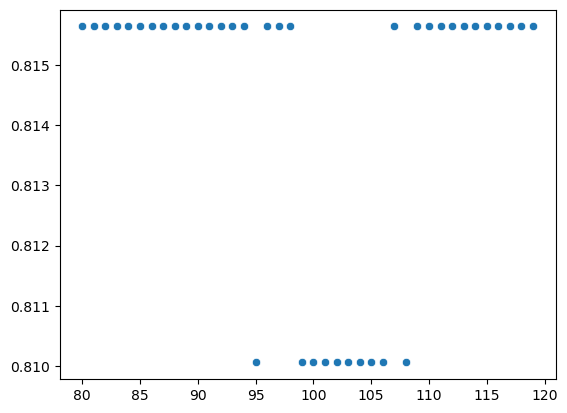

In [80]:
wcss = []
for i in range(80, 120 ):
    RandomF = RandomForestClassifier(n_estimators= i, max_depth=5, random_state=42)
    RandomF.fit(X_train , y_train)
    wcss.append(accuracy_score(RandomF.predict(X_test),y_test))
sns.scatterplot(x=range(80, 120 ), y=wcss)


In [81]:
clf_R = RandomForestClassifier(n_estimators= 96, max_depth=5, random_state=42)
scores = cross_validate(clf_R , X , y , scoring=['accuracy','average_precision'] , cv=10)
scores

{'fit_time': array([0.15745807, 0.15016413, 0.15167284, 0.15371776, 0.15349627,
        0.15603566, 0.1596849 , 0.14739799, 0.15602326, 0.17133737]),
 'score_time': array([0.03125811, 0.03031206, 0.02822876, 0.02819085, 0.02666163,
        0.02027273, 0.02664971, 0.03028655, 0.02506208, 0.02443504]),
 'test_accuracy': array([0.8       , 0.83146067, 0.7752809 , 0.88764045, 0.85393258,
        0.7752809 , 0.80898876, 0.76404494, 0.84269663, 0.83146067]),
 'test_average_precision': array([0.82494993, 0.87613434, 0.73289776, 0.891765  , 0.89843475,
        0.81979711, 0.86422693, 0.83787031, 0.91172285, 0.87283669])}

In [82]:
scores = pd.DataFrame(scores)
scores

,fit_time,score_time,test_accuracy,test_average_precision
0,0.157458,0.031258,0.800000,0.824950
1,0.150164,0.030312,0.831461,0.876134
2,0.151673,0.028229,0.775281,0.732898
3,0.153718,0.028191,0.887640,0.891765
4,0.153496,0.026662,0.853933,0.898435
5,0.156036,0.020273,0.775281,0.819797
6,0.159685,0.026650,0.808989,0.864227
7,0.147398,0.030287,0.764045,0.837870
8,0.156023,0.025062,0.842697,0.911723
9,0.171337,0.024435,0.831461,0.872837


In [83]:
scores.test_accuracy.mean()

0.8170786516853934

In [84]:
scores.test_average_precision.mean()

0.8530635679729273

# ================================================================

### the best algorithm SVC

In [96]:
d_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [97]:
d_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [98]:
data_v1 =d_test.isna().sum().to_frame().reset_index()
data_v1.rename(columns={0: 'na_count'}, inplace=True)
data_v1


,index,na_count
0,PassengerId,0
1,Pclass,0
2,Name,0
3,Sex,0
4,Age,86
5,SibSp,0
6,Parch,0
7,Ticket,0
8,Fare,1
9,Cabin,327


In [99]:
d_test=d_test[['Pclass','Sex','Age','SibSp','Parch','Embarked']]

In [100]:
d_test['Age'].fillna(d_test['Age'].mean() ,  inplace=True)

for feature in ['Sex', 'Embarked']:
    tag = feature + '_label'
    d_test[tag] = labeled.fit_transform(d_test[feature])
    
d_test.drop(['Sex','Embarked'], axis = 1, inplace = True)

d_test['family_size'] = d_test['Parch'] + d_test['SibSp'] + 1

d_test.drop(['SibSp','Parch'], axis = 1, inplace = True)

C:\Users\PC\AppData\Local\Temp\ipykernel_10728\2593784502.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PC\AppData\Local\Temp\ipykernel_10728\2593784502.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PC\AppData\Local\Temp\ipykernel_10728\2593784502.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [101]:
d_test

,Pclass,Age,Sex_label,Embarked_label,family_size
0,3,34.50000,1,1,1
1,3,47.00000,0,2,2
2,2,62.00000,1,1,1
3,3,27.00000,1,2,1
4,3,22.00000,0,2,3
...,...,...,...,...,...
413,3,30.27259,1,2,1
414,1,39.00000,0,0,1
415,3,38.50000,1,2,1
416,3,30.27259,1,2,1


In [104]:
clf_svc = SVC(C=100,gamma=0.01)
clf_svc.fit(X,y)
test_pred =clf_svc.predict(d_test)

In [105]:
test_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [106]:
gender_submission = pd.read_csv('gender_submission.csv')

In [109]:
gender_test = gender_submission.iloc[:,-1].values

In [110]:
accuracy_score(gender_test ,test_pred )

0.9569377990430622

##                   Thinks you 